## ANN  Churn_modeling 

In [1]:
import tensorflow as tf
print(tf.__version__)

c:\Users\gadhv\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\gadhv\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\gadhv\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

2.20.0-rc0


In [2]:
# import some basic libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# divide the dataset into independent and dependent features

X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
# feature engineering

geography = pd.get_dummies(X['Geography'], dtype=int , drop_first=True)

gender = pd.get_dummies(X['Gender'] , drop_first= True)


In [8]:
X = X.drop(['Geography', 'Gender'], axis=1)

In [9]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [10]:
X = pd.concat([X,geography,gender], axis=1)

In [11]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]], shape=(8000, 11))

In [14]:
X_train.shape

(8000, 11)

In [15]:
# part 02  now lets create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [17]:
## lets intialize the ANN
classifier = Sequential()## lets intialize the ANN
classifier = Sequential()

In [18]:
## ADDING THE input layer

classifier.add(Dense(units=11, activation='relu' ))

In [19]:
# addingthe first hidden layers

classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.3))

In [20]:
## adding the secound hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [21]:
# adding the output layer

classifier.add(Dense(1,activation='sigmoid'))
classifier.add(Dropout(0.3))

In [24]:
classifier.compile(optimizer= opt, loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [25]:
# early stoping

import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [26]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7792 - loss: 1.3786 - val_accuracy: 0.7955 - val_loss: 0.4631
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8046 - loss: 1.3071 - val_accuracy: 0.7952 - val_loss: 0.4277
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8057 - loss: 1.2870 - val_accuracy: 0.7955 - val_loss: 0.4593
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7962 - loss: 1.3304 - val_accuracy: 0.7955 - val_loss: 0.4587
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7981 - loss: 1.2458 - val_accuracy: 0.7963 - val_loss: 0.4317
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8056 - loss: 1.2893 - val_accuracy: 0.7986 - val_loss: 0.4511
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8031 - loss: 1.3246 - val_accuracy: 0.8023 - val_loss: 0.4215
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8071 - loss: 1.2765 - 

In [27]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

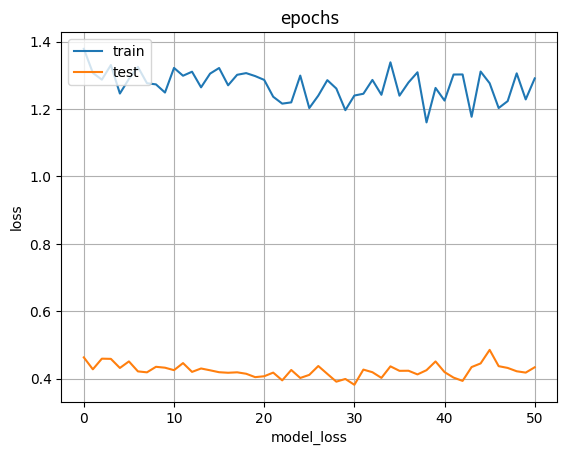

In [28]:
import matplotlib.pyplot as plt

# Assuming model_history is your history object from model.fit()
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])  # or 'val_acc' if using older TF
plt.xlabel('model_loss')
plt.ylabel('loss')
plt.title('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()


In [29]:
# part 03  predicting and evaluating the model

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [30]:
# make the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)
cm

array([[1595,    0],
       [ 367,   38]])

In [31]:
# calculate the accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8165

In [32]:
# to get the weight

classifier.get_weights()

[array([[-0.20438191,  0.43014726, -0.06320277,  0.10088872, -0.40432036,
         -0.53783554, -0.28195474,  0.7148863 ,  1.7527654 , -0.39176458,
         -0.19209799],
        [ 1.3265754 , -2.015805  ,  2.0571544 ,  3.3470385 ,  0.44047716,
          0.5875243 , -0.7190321 , -1.1740848 ,  0.01304632,  0.28188866,
          2.1699235 ],
        [-0.3269743 ,  1.0634902 , -0.48922253,  0.10801017,  0.59603745,
          1.2032416 ,  0.42147028, -0.56352615,  0.6351751 ,  1.6323003 ,
          0.22862045],
        [ 0.6520028 , -2.4313753 , -0.95133805,  0.012695  , -3.3944504 ,
         -1.9326837 , -1.7554859 , -1.0735731 ,  0.10359429, -1.3076199 ,
          0.03033589],
        [ 3.6437268 , -0.2531177 ,  0.01867747, -2.3921378 , -3.0162103 ,
         -3.0613306 , -0.00636908,  0.6012543 ,  0.02267459,  0.31069988,
         -0.12505594],
        [-0.02304265, -1.0279199 , -0.11629266, -0.19502927, -0.22693421,
         -0.351471  ,  0.2942883 ,  0.846492  ,  0.659117  ,  0.0948316